# Amyotrophic Lateral Sclerosis (ALS) Case-Study Cluster Analysis

In this task, the ALS dataset that was provided by the client was used to carry out the analysis. The task aimed to establish what patient’s phenotypes could be automatically and reliably identified and used to predict the change of AlSFRS slope over a period using the K-Means clustering algorithm. 

In [363]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [312]:
# importing the dataset
ALS_traindata = pd.read_csv('D:\\Python\\Datafolder\\ALS Disease\\ALS_TrainingData_2223.csv')
ALS_testdata = pd.read_csv('D:\\Python\\Datafolder\\ALS Disease\\ALS_TestingData_78.csv')

In [4]:
ALS_traindata.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [5]:
ALS_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB


In [113]:
ALS_traindata.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,...,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,...,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,...,112.000000,0.000000,533.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,614.500000,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,...,135.000000,0.010582,240825.500000,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,1213.000000,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,...,137.000000,0.013123,496835.000000,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,1815.500000,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,...,138.000000,0.017278,750300.500000,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,2424.000000,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,...,145.000000,0.142857,999482.000000,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


In [26]:
# Checking for null values
ALS_traindata.isnull().sum()

ID                 0
Age_mean           0
Albumin_max        0
Albumin_median     0
Albumin_min        0
                  ..
trunk_min          0
trunk_range        0
Urine.Ph_max       0
Urine.Ph_median    0
Urine.Ph_min       0
Length: 101, dtype: int64

<AxesSubplot:>

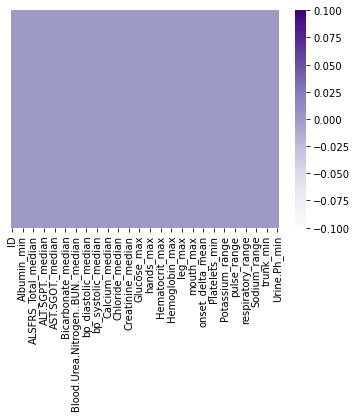

In [38]:
#Visualizing the null values
sns.heatmap(ALS_traindata.isnull(), yticklabels=False, cmap='Purples')

### Visualizing the data

<AxesSubplot:ylabel='Frequency'>

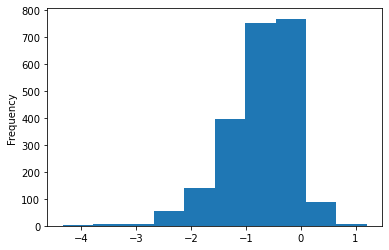

In [8]:
# Visualizing the ALSFRS_slope distribution
ALS_traindata["ALSFRS_slope"].plot.hist()

In [42]:
#Creating sliced parts of the dataframe to check correlation since the data is too large.
# Focusing on the correlation between other variables and 'ALSFRS_slope' variable
slice1 = pd.concat([ALS_traindata[ALS_traindata.columns[1:10]], ALS_traindata["ALSFRS_slope"]], join = 'outer', axis = 1)
slice2 = pd.concat([ALS_traindata[ALS_traindata.columns[10:20]], ALS_traindata["ALSFRS_slope"]], join = 'outer', axis = 1)
slice3 = pd.concat([ALS_traindata[ALS_traindata.columns[20:30]], ALS_traindata["ALSFRS_slope"]], join = 'outer', axis = 1)
slice4 = pd.concat([ALS_traindata[ALS_traindata.columns[30:40]], ALS_traindata["ALSFRS_slope"]], join = 'outer', axis = 1)
slice5 = pd.concat([ALS_traindata[ALS_traindata.columns[40:50]], ALS_traindata["ALSFRS_slope"]], join = 'outer', axis = 1)
slice6 = pd.concat([ALS_traindata[ALS_traindata.columns[50:60]], ALS_traindata["ALSFRS_slope"]], join = 'outer', axis = 1)

<AxesSubplot:>

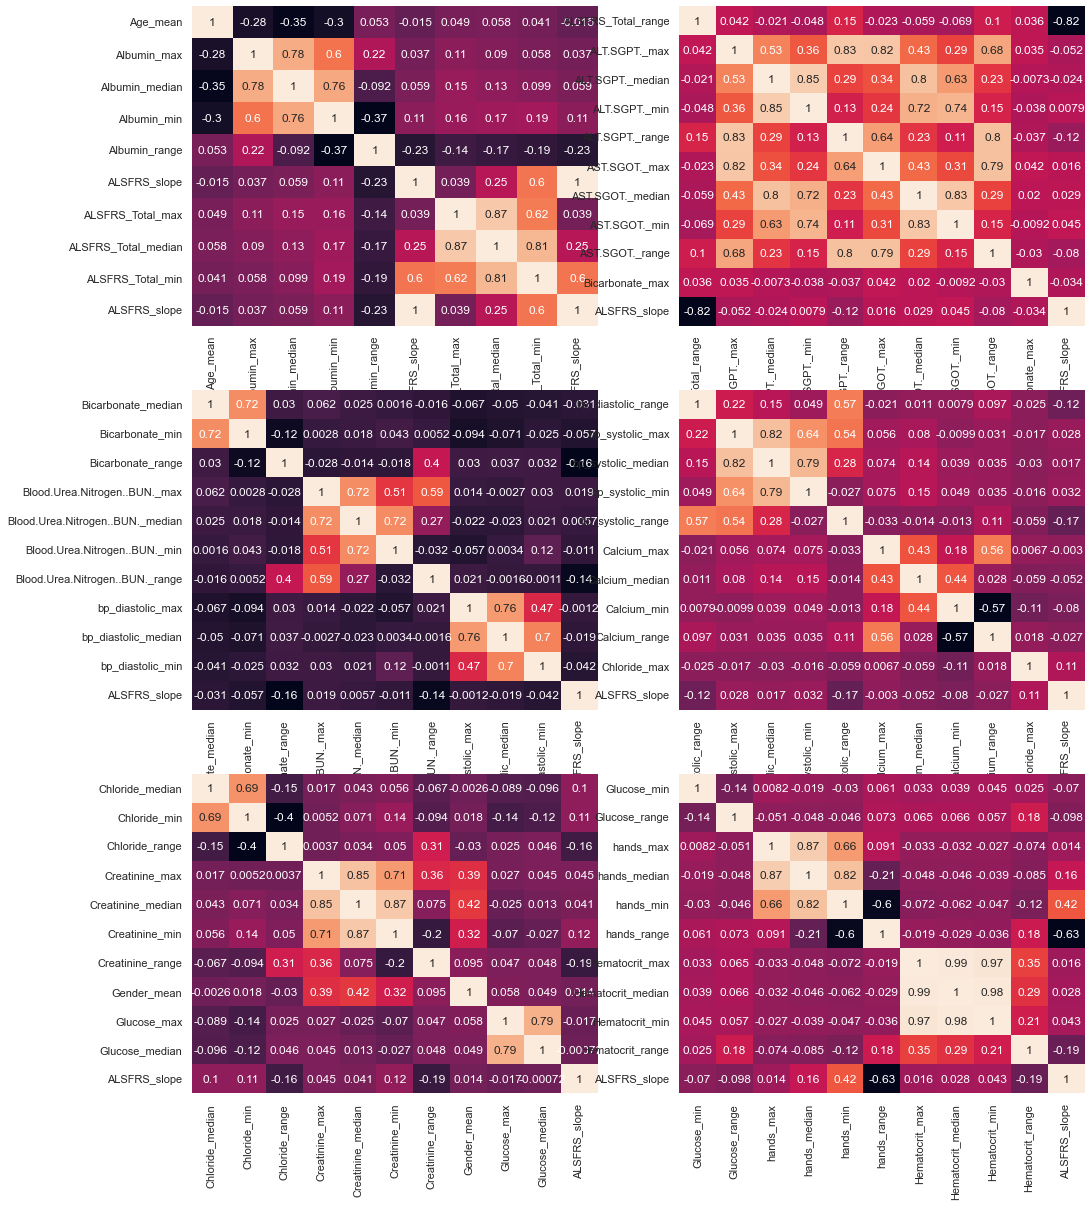

In [73]:
fig, ax =plt.subplots(3, 2, figsize=(16,20))
sns.heatmap(slice1.corr(), annot=True, cbar=False, ax=ax[0, 0])
sns.heatmap(slice2.corr(), annot=True, cbar=False, ax=ax[0, 1])
sns.heatmap(slice3.corr(), annot=True, cbar=False, ax=ax[1, 0])
sns.heatmap(slice4.corr(), annot=True, cbar=False, ax=ax[1, 1])
sns.heatmap(slice5.corr(), annot=True, cbar=False, ax=ax[2, 0])
sns.heatmap(slice6.corr(), annot=True, cbar=False, ax=ax[2, 1])

In [90]:
#Continuation of sliced parts of the dataframe to check correlation since the data is too large.
slice7 = pd.concat([ALS_traindata[ALS_traindata.columns[60:70]], ALS_traindata["ALSFRS_slope"]], join = 'outer', axis = 1)
slice8 = pd.concat([ALS_traindata[ALS_traindata.columns[70:80]], ALS_traindata["ALSFRS_slope"]], join = 'outer', axis = 1)
slice9 = pd.concat([ALS_traindata[ALS_traindata.columns[80:90]], ALS_traindata["ALSFRS_slope"]], join = 'outer', axis = 1)
slice10 = pd.concat([ALS_traindata[ALS_traindata.columns[90:101]], ALS_traindata["ALSFRS_slope"]], join = 'outer', axis = 1)


<AxesSubplot:>

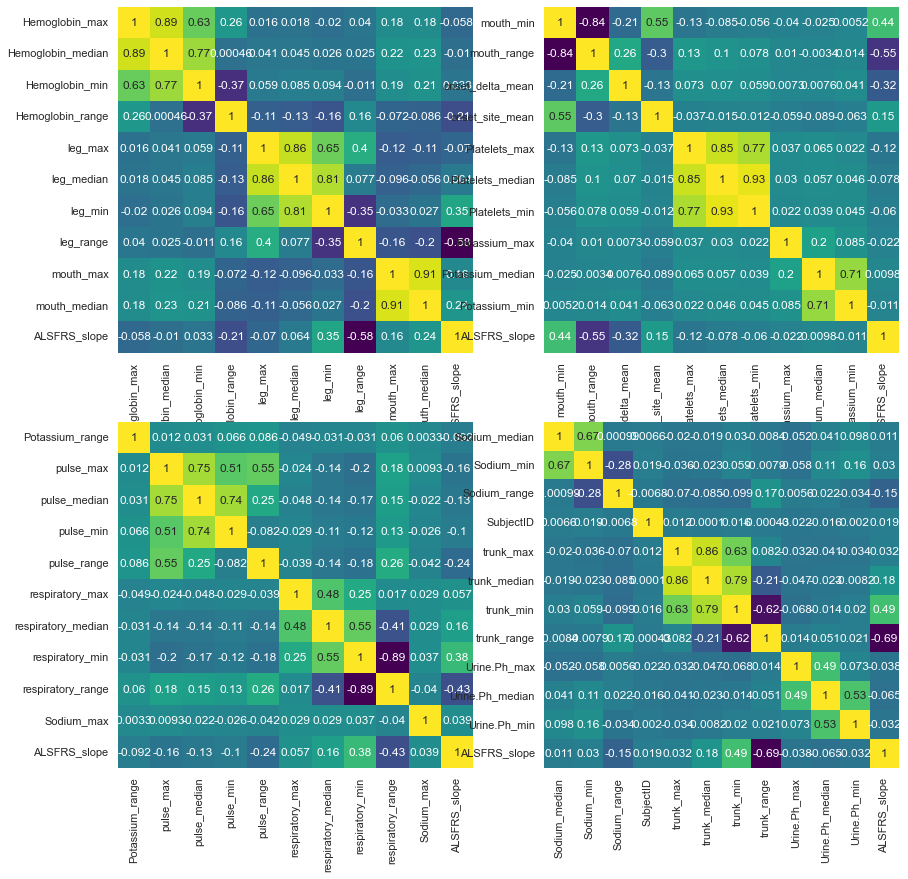

In [97]:
# Similarly observing the correlations of the rest of the data.
fig, ax =plt.subplots(2, 2, figsize=(14,14))
sns.heatmap(slice7.corr(), annot=True, cbar=False, cmap='viridis', ax=ax[0, 0])
sns.heatmap(slice8.corr(), annot=True, cbar=False, cmap='viridis', ax=ax[0, 1])
sns.heatmap(slice9.corr(), annot=True, cbar=False, cmap='viridis', ax=ax[1, 0])
sns.heatmap(slice10.corr(), annot=True, cbar=False, cmap='viridis', ax=ax[1, 1])


### Results of the most correlated variables with 'ALSFRS_slope'

<AxesSubplot:>

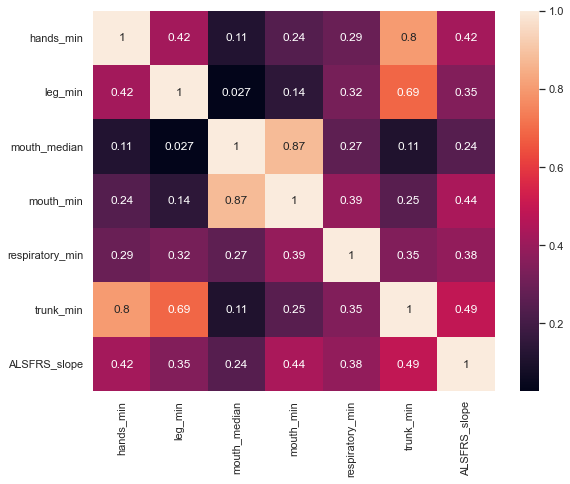

In [104]:
# Results of the most correlated variables with 'ALSFRS_slope'
mostcorrelated = lice7 = pd.concat([ALS_traindata['hands_min'], ALS_traindata['leg_min'], 
                                    ALS_traindata['mouth_median'], ALS_traindata['mouth_min'],
                                    ALS_traindata['respiratory_min'], ALS_traindata['trunk_min'],
                                    ALS_traindata["ALSFRS_slope"]], join = 'outer', axis = 1)
# Correlation matrix
sns.set(rc={'figure.figsize':(9,7)})
sns.heatmap(mostcorrelated.corr(), annot=True)

<AxesSubplot:xlabel='trunk_min', ylabel='ALSFRS_slope'>

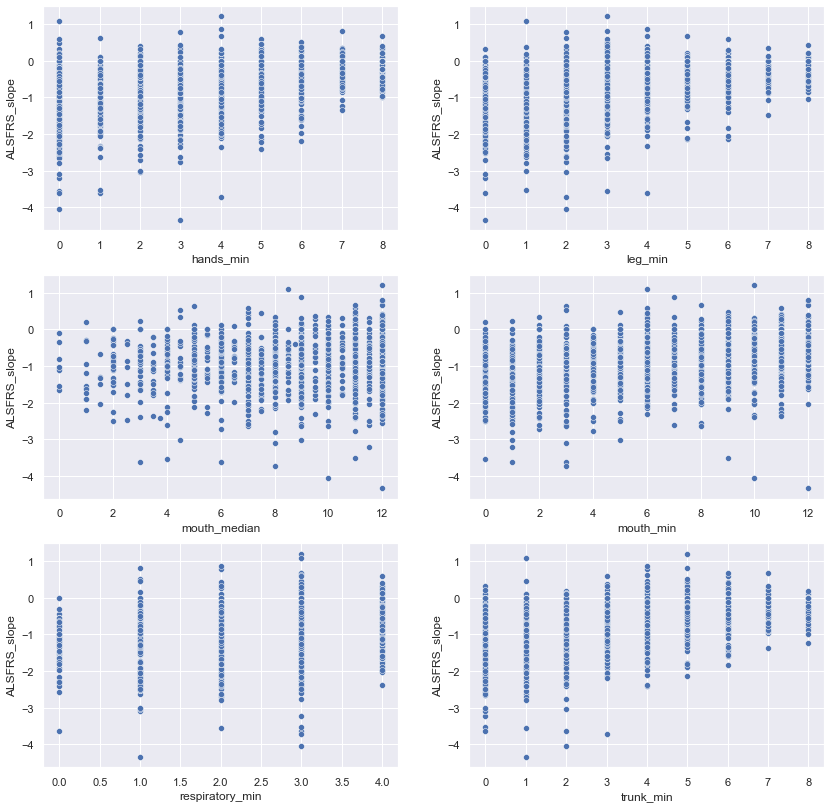

In [110]:
# Visualizing the correlated variables on scatter plot
fig, ax =plt.subplots(3, 2, figsize=(14,14))
sns.scatterplot(data=ALS_traindata, x= ALS_traindata['hands_min'], y= ALS_traindata["ALSFRS_slope"], ax=ax[0, 0])
sns.scatterplot(data=ALS_traindata, x= ALS_traindata['leg_min'], y= ALS_traindata["ALSFRS_slope"], ax=ax[0, 1])
sns.scatterplot(data=ALS_traindata, x= ALS_traindata['mouth_median'], y= ALS_traindata["ALSFRS_slope"], ax=ax[1, 0])
sns.scatterplot(data=ALS_traindata, x= ALS_traindata['mouth_min'], y= ALS_traindata["ALSFRS_slope"], ax=ax[1, 1])
sns.scatterplot(data=ALS_traindata, x= ALS_traindata['respiratory_min'], y= ALS_traindata["ALSFRS_slope"], ax=ax[2, 0])
sns.scatterplot(data=ALS_traindata, x= ALS_traindata['trunk_min'], y= ALS_traindata["ALSFRS_slope"], ax=ax[2, 1])


### Establishing the model

In [286]:
X = ALS_traindata.values

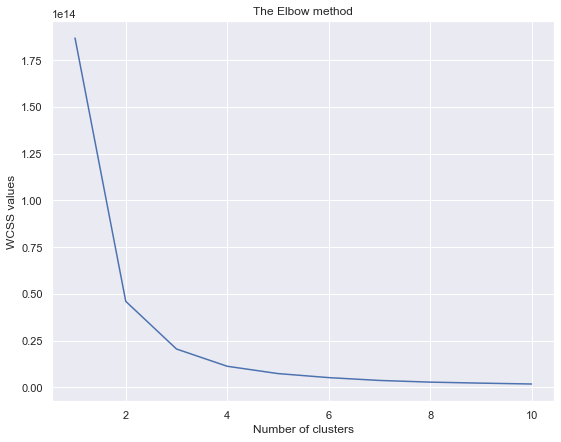

In [287]:
# Finding the best number of clusters for the model and drawing the graph
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS values')
plt.show()

In [374]:
# Creating the model
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [375]:
# Predicting our data using the model
y_kmeans = kmeansmodel.fit_predict(X)

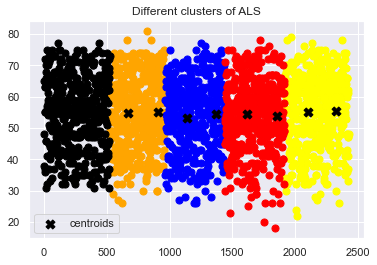

In [376]:
# Plotting the scatter plots
plt.scatter(X[y_kmeans ==0,0], X[y_kmeans == 0,1], s=50, color='orange')
plt.scatter(X[y_kmeans ==1,0], X[y_kmeans == 1,1], s=50, color='blue')
plt.scatter(X[y_kmeans ==2,0], X[y_kmeans == 2,1], s=50, color='yellow')
plt.scatter(X[y_kmeans ==3,0], X[y_kmeans == 3,1], s=50, color='red')
plt.scatter(X[y_kmeans ==4,0], X[y_kmeans == 4,1], s=50, color='black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="black", s=80, label="centroids")
plt.title('Different clusters of ALS')
plt.legend()
plt.show()

In [364]:
#checking the centers
centers = kmeans.cluster_centers_

In [368]:
centers= pd.DataFrame(centers)
centers

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,667.092920,54.646018,46.775929,43.803540,40.761062,0.012962,-0.731567,31.548673,26.887168,19.752212,...,136.814159,0.014928,268693.721239,6.185841,4.882743,2.915929,0.007295,6.838496,5.715708,5.201327
1,1857.382222,53.880000,47.143111,44.124444,40.962667,0.013838,-0.675044,31.195556,26.582222,20.084444,...,136.915556,0.015786,769606.697778,6.137778,4.766667,3.040000,0.006881,6.749778,5.656667,5.144444
2,1137.330144,53.244019,47.310048,44.063636,40.826316,0.014500,-0.743107,31.904306,27.557416,19.803828,...,136.899522,0.013647,464123.626794,6.244019,4.961722,2.918660,0.007329,6.796651,5.705742,5.157895
3,133.464435,54.832636,47.141423,44.009623,40.808368,0.014157,-0.696868,31.418410,26.895397,19.627615,...,136.816318,0.014867,51799.933054,6.054393,4.822176,2.887029,0.006872,6.846904,5.736402,5.196653
4,2101.555046,55.018349,46.887156,43.753670,40.576651,0.014207,-0.744140,31.871560,27.123853,20.077982,...,136.889908,0.014588,866516.041284,6.279817,4.974771,3.064220,0.007111,6.907890,5.732798,5.205505
5,905.724771,55.004587,46.750000,43.708028,40.569450,0.014685,-0.803299,31.293578,27.014908,19.399083,...,136.545872,0.014882,371439.738532,6.151376,4.878440,2.793578,0.007544,6.866789,5.753440,5.190367
6,1617.375546,54.554585,46.921397,43.830568,40.738865,0.013215,-0.722816,32.161572,27.451965,20.406114,...,136.454148,0.014795,669897.170306,6.301310,5.017467,3.104803,0.006814,6.831878,5.708515,5.165939
7,406.888889,54.472222,47.263492,44.205556,40.920794,0.013414,-0.766073,32.007937,27.202381,19.599206,...,136.591270,0.015929,159202.460317,6.273810,4.900794,2.964286,0.007081,6.840714,5.712698,5.170635
8,2321.891892,55.416216,46.918324,43.932703,40.644324,0.013535,-0.695723,31.724324,27.021622,20.054054,...,137.029189,0.014792,956393.454054,6.118919,4.748649,2.881081,0.007178,6.680595,5.704054,5.213514
9,1370.905405,54.513514,46.956757,44.054505,40.805405,0.013354,-0.699315,31.783784,27.326577,20.027027,...,136.671171,0.015540,564909.702703,6.279279,4.963964,2.972973,0.007316,6.818018,5.678604,5.191441


### Testing the model

In [143]:
ALS_testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Columns: 131 entries, ID to White.Blood.Cell..WBC._range
dtypes: float64(92), int64(39)
memory usage: 80.0 KB


In [198]:
ALS_testdata.drop(['Basophils_max', 'Basophils_median', 'Basophils_min', 'Basophils_range',
                   'Bilirubin..total._max', 'Bilirubin..total._median', 'Bilirubin..total._min',  
                   'Bilirubin..total._range', 'BMI_max', 'Eosinophils_max', 'Eosinophils_median', 
                  'Eosinophils_min', 'Eosinophils_range', 'Lymphocytes_max', 'Lymphocytes_median', 
                   'Lymphocytes_min', 'Lymphocytes_range', 'Monocytes_max', 'Monocytes_median', 
                   'Monocytes_min', 'Monocytes_range', 'Red.Blood.Cells..RBC._max', 
                   'Red.Blood.Cells..RBC._median', 'Red.Blood.Cells..RBC._min', 
                   'Red.Blood.Cells..RBC._range', 'White.Blood.Cell..WBC._max', 
                   'White.Blood.Cell..WBC._median', 'White.Blood.Cell..WBC._min', 
                  'White.Blood.Cell..WBC._range', 'Urine.Ph_range'], axis=True, inplace=True)

In [293]:
ALS_testdata.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,...,137,0.016393,55888,7,0.0,0,0.006440,6.5,6.00,6.0
1,4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,...,135,0.019651,61505,6,3.0,0,0.013100,6.5,5.50,5.0
2,5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,...,136,0.006954,63255,0,0.0,0,0.000000,7.5,6.75,6.0
3,6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,...,138,0.051546,70641,8,5.5,5,0.007752,7.5,7.00,6.0
4,9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,...,140,0.014218,108342,7,7.0,7,0.000000,6.0,5.50,5.0


In [294]:
X2 = ALS_testdata.values

In [377]:
# Predicting the test data data using the model
y_pred= kmeansmodel.predict(X2)

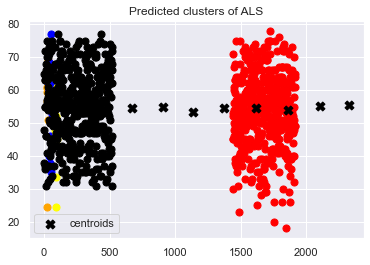

In [378]:
# Plotting the scatter plots
plt.scatter(X2[y_pred ==0,0], X2[y_pred == 0,1], s=50, color='orange')
plt.scatter(X2[y_pred ==1,0], X2[y_pred == 1,1], s=50, color='blue')
plt.scatter(X2[y_pred ==2,0], X2[y_pred == 2,1], s=50, color='yellow')
plt.scatter(X[y_kmeans ==3,0], X[y_kmeans == 3,1], s=50, color='red')
plt.scatter(X[y_kmeans ==4,0], X[y_kmeans == 4,1], s=50, color='black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="black", s=80, label="centroids")
plt.title('Predicted clusters of ALS')
plt.legend()
plt.show()

## The End